# EMPATHY PREDICTION USING MULTILAYER PERCEPTRON

*"Most people think empathy is something that you reserve for your life, your family or your friends but the reality is that it is an existential priority for a business. Our business is to meet unmet, unarticulated needs of our customers. There is no way that innovation is gonna come out if we don’t listen to the words and understand the true meaning behind them by being empathetic." - Satya Nadella, CEO of Microsoft.*

**Dataset Information** : The dataset used is called Young People Survey Dataset from Kaggle (*https://www.kaggle.com/miroslavsabo/young-people-survey/*). It contains 1010 rows and 150 columns.

**Problem Statement** : You are working for a non-profit that is recruiting student volunteers to help with Alzheimer's patients. You have been tasked with predicting how suitable a person is for this task by predicting how empathetic he or she is on the scale of 1 to 5. 

The various important features like preferences, interests, habits, opinions, and fears of young people. After exploring such features, a machine learning model is build and predictions are made for the young people's empathy. This project mainly consists of four parts: <br>
**1) Data Loading and Preprocessing.**<br>
**2) Feature Engineering.**<br>
**3) Model Training and Testing.**<br>
**4) Model Comparisons and Conclusion.**<br>
**4) Interesting Insights drawn from Dataset.**<br>

## Data Loading

In [2]:
# Import all the important libraries from "imports" file. 
from imports import *

First of all, import the datasets using pandas. The file 'importDataset' contains the code for importing.

In [3]:
# Import the datasets (responses and columns).
import dataImport

responsesData, columnsData = dataImport.importDataset()
print("Datasets loaded!")
print("Shape of the data : {0} and {1}".format(responsesData.shape, columnsData.shape))

Datasets loaded!
Shape of the data : (1010, 150) and (150, 2)


Now, let's try to understand the data in even more detail.

In [4]:
# Some styling..
pd.set_option('display.max_columns',150)
pd.set_option('display.max_rows',1010)
plt.style.use('bmh')

In [5]:
print("Responses Data")
responsesData.head(n=3)

Responses Data


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,tried smoking,drink a lot,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,i am often running late,sometimes,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats


In [6]:
print("Columns Data")
columnsData.head(n=3)

Columns Data


,original,short
0,I enjoy listening to music.,Music
1,I prefer.,Slow songs or fast songs
2,"Dance, Disco, Funk",Dance


## Data Preprocessing

Now, after importing datasets, preprocessing the imported datasets is very important. The datasets include some missing values. After having look at the dataset, there are not much missing values. There could be numerous ways to handle data with missing values. <br>
1) Dropping the entire row. <br>
2) Filling the missing values with some data (mean, median, most frequent).<br><br>
Dropping the entire row from the dataset might not be the most intelligent way because the row might contain some important information needed for building our model. Also, since not many data entries are missing, we can also replace the empty cells with the most frequent entries of the columns.<br><br>
Also, while preprocessing, we need to take care of the categorical features. The dataset contains 11 categorical features. I have converted the categorical features into numeric. The approach used here is to get the unique values of the columns and assign each of the unique values with a number (1 - N) with N unique values.

In [7]:
# Collect the dataset with missing values filled with the most frequent entry in the column. 
# The code for preprocessing is in 'preprocessing' file.
import preprocessing

print("Preprocessing data might take some time..")
print("1) Missing values are being handled!")
print("2) Categorical entries are getting converted to numeric values!")
print("3) Dummy variables are being handled!")
filledData = preprocessing.preprocessingDataset(responsesData)
print("Done preprocessing data!")

Preprocessing data might take some time..
1) Missing values are being handled!
2) Categorical entries are getting converted to numeric values!
3) Dummy variables are being handled!
Done preprocessing data!


Below is the preprocessed dataset! Have a look at it and see that the categorical feature entries are converted to numeric values.

In [8]:
filledData.head(n=3)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,5.0,3.0,1.0,3.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1.0,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4.0,2.0,3.0,2.0,1.0,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,3.0,20.0,163.0,48.0,1.0,2.0,1.0,4.0,2.0,1.0,1.0,3.0,4.0,5.0,3.0,3.0,1.0,3.0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,4.0,1.0,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1.0,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3.0,1.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,3.0,19.0,163.0,58.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,3.0,4.0,1.0,4.0,2.0,5.0,2.0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,3.0,1.0,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5.0,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1.0,3.0,3.0,1.0,3.0,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,3.0,20.0,176.0,67.0,2.0,2.0,1.0,3.0,2.0,2.0,1.0,2.0,4.0,1.0,4.0,3.0,4.0,2.0


Note that some models require the data to be normalized. So, let's also scale the preprocessed dataset ahead.

In [9]:
# Scale the dataset.
# The code for scaling is in 'preprocessing' file.
import preprocessing

scaledData = preprocessing.scalingDataset(filledData)
scaledData.head(n=3)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating
0,0.403273,-0.393510,-0.953054,-1.133326,-0.114423,-0.766617,-1.399805,1.316768,1.038933,-0.989179,-1.109735,-1.393661,-1.464158,-1.404945,-0.114080,-1.363514,-1.386355,-1.004675,-0.962102,0.554401,0.857335,-1.156432,0.647157,0.423958,0.677223,-1.601038,1.055152,0.991071,-0.572789,-0.985739,-1.245657,-0.874484,-0.835663,-0.995506,-1.247843,-1.176378,1.314642,0.425059,-1.139412,-0.031179,-0.662541,-1.749202,1.484387,-1.233309,0.495135,0.765568,0.892322,-0.102977,1.753667,0.245325,0.615391,-0.113726,-0.064408,1.065574,0.355771,-1.010792,-1.165867,-1.194347,-0.962438,1.089904,0.374265,0.447924,0.080895,-1.713682,1.131472,2.641562,-1.070561,0.563545,0.600284,-0.776646,0.598730,0.741437,0.426136,1.334237,-1.564398,1.035622,-0.964315,-0.531956,1.363866,0.788356,-1.244952,1.71101,0.150962,0.014330,-1.256443,-0.698920,1.516637,-1.081120,-1.058963,-0.164452,0.368632,-2.166612,-1.020341,-0.786278,-0.764104,-1.012244,0.784635,0.860067,-0.018825,0.099829,-1.396290,-2.094881,-1.529567,-1.555202,1.029526,-0.097949,-0.325707,-0.057472,-2.379507,0.326381,0.456808,-0.246999,0.425594,-0.144428,1.109530,-0.060183,1.234521,-2.285118,-1.720734,-0.446470,1.163452,1.379023,-1.480905,0.35632,1.365766,-1.617974,1.104045,0.102951,-1.220851,-0.470098,0.849772,0.227954,0.039878,-0.150264,-1.051626,-1.331846,-0.293082,0.828338,-0.333333,0.912374,0.579637,-1.542053,-0.828338,-0.020806,0.580059,1.494582,-0.169377,-0.088064,-1.456239,-0.511229
1,-1.105266,0.807231,-0.953054,-1.133326,-1.046416,-1.568153,-0.605534,-0.408181,1.038933,1.196972,1.194924,-1.393661,0.189056,-1.404945,0.697335,0.872118,-0.631113,-1.004675,-0.962102,0.554401,-0.559863,-1.156432,-0.636986,-0.404278,0.677223,-1.601038,-0.637785,0.991071,0.313148,-0.985739,0.372496,-0.874484,-0.835663,-0.995506,-0.474640,-1.176378,-1.351600,-1.003593,0.303605,-1.495870,0.985653,-1.749202,-0.109692,1.086322,1.974679,-0.050069,-0.194825,0.656198,1.753667,-1.203668,-0.838515,0.554086,0.719357,1.065574,-1.093136,-0.205666,-0.471980,-0.438526,-0.962438,-2.253462,-1.005324,-0.874893,-0.697235,-1.713682,-1.527718,-0.767994,-0.283040,-0.215088,-0.182022,-0.776

## Data Visualization

Another important thing to note about such huge datasets is that it is interesting to explore the multicollinearity between features and try to draw some interesting conclusions from the observations.

In [10]:
relations = filledData.corr()
# The line of code below is used from a question posted in StackOverflow
# Link : https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
multicollinearity = (relations.where(np.triu(np.ones(relations.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))

In [11]:
# Top positive correlations are:
multicollinearity.head(n=15)

Biology              Medicine             0.698978
                     Chemistry            0.678672
Height               Weight               0.672718
Fantasy/Fairy tales  Animated             0.672660
Shopping             Shopping centres     0.650524
Chemistry            Medicine             0.618999
Age                  Education            0.608246
Classical music      Opera                0.594194
Mathematics          Physics              0.591137
Snakes               Rats                 0.569796
Life struggles       Gender               0.564148
Metal or Hardrock    Punk                 0.543473
Art exhibitions      Theatre              0.527735
Rock                 Metal or Hardrock    0.519108
Shopping             Spending on looks    0.510390
dtype: float64

In [12]:
# Top negative correlations are:
multicollinearity.tail(n=15)

Loneliness              Energy levels            -0.345851
Changing the past       Happiness in life        -0.350876
Western                 Gender                   -0.355878
Science and technology  Gender                   -0.358491
Life struggles          Height                   -0.372130
Dangerous dogs          Small - big dogs         -0.372687
Life struggles          Weight                   -0.374039
Action                  Gender                   -0.403129
War                     Gender                   -0.413348
Loneliness              Happiness in life        -0.434831
Cars                    Gender                   -0.438336
PC                      Gender                   -0.460930
Village - town          House - block of flats   -0.601867
Weight                  Gender                   -0.637442
Height                  Gender                   -0.679048
dtype: float64

As you can see, there are many features related to gender. Most correlated features are height, weight, PC, Cars, Action and War. Most of them are very clear to understant like men are more into war, action and cars. The person who likes Biology would also most likely, like Maths and Chemistry.

But there are some features which left me puzzled like how can 'gender be related to western movies' and 'life struggles be related to height and weight'. I did some research about it which I would like to disclose it at the end. To know the mystery behind what's going on, keep reading.......

Let's continue our visualization process. Following information would help us identify the columns which are very biased could add unnecesary bias in our model.

In [13]:
filledData.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating
count,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.00000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.00000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.00000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,4.732673,3.327723,3.112871,2.287129,2.122772,2.956436,2.762376,3.473267,3.769307,2.357426,2.444554,2.914851,2.771287,2.761386,3.140594,2.829703,2.835644,2.329703,2.138614,4.615842,2.790099,3.384158,4.496040,3.488119,3.112871,3.155446,3.753465,3.792079,3.646535,2.121782,3.539604,2.058416,1.972277,2.248515

## Feature Engineering

The most important step in our project is to select the most important features out of 150 features in order to reduce the computation time and complexity. This also helps us in know what features are totally irrelevant to our target variable "Empathy". I have used correlations between several features and the most correlated features are given as the most important features.

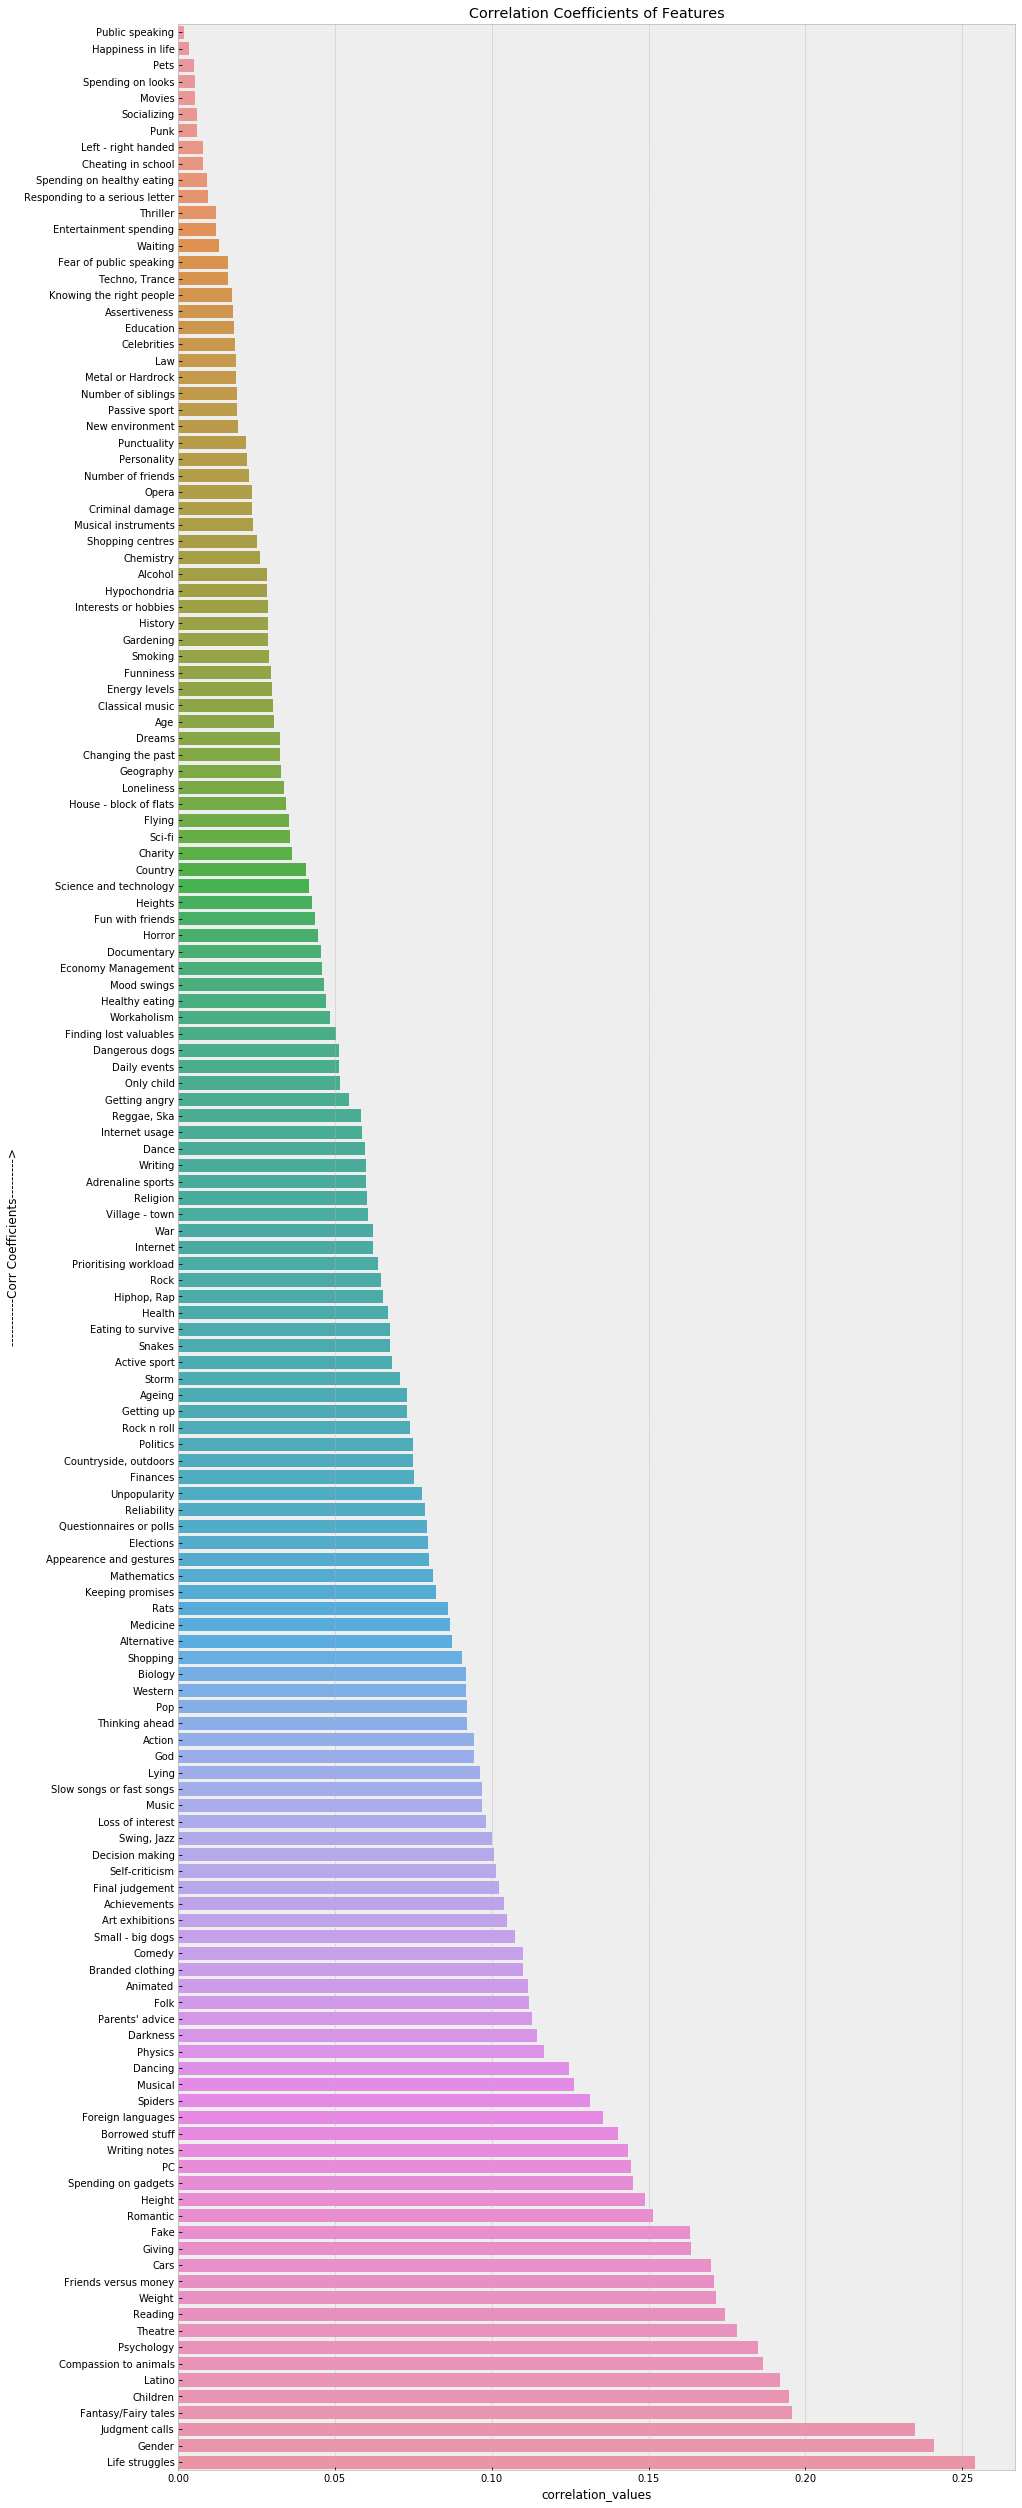

In [14]:
# Plotting the correlations with respect to "Empathy" variable
import plotting
target = "Empathy"
targetVariable = filledData['Empathy'].to_frame()
corrData = plotting.correlationFigure(scaledData, target)
importantFeatures = corrData.sort_values(by="correlation_values", ascending=True).tail(20)

In [15]:
# 20 most important feature with their correlation values
importantFeatures

,correlation_values,features
78,0.143482,Writing notes
47,0.144468,PC
147,0.145000,Spending on gadgets
133,0.148855,Height
23,0.151416,Romantic
87,0.163273,Fake
95,0.163509,Giving
56,0.169939,Cars
85,0.170961,Friends versus money
134,0.171487,Weight


Now, let's join all the important features to make a completely prepared dataset.

In [16]:
finalColumnsList = []
for x in importantFeatures['features']:
    finalColumnsList.append(x)

df = pd.DataFrame() # Final prepared dataset for modelling
df = filledData[finalColumnsList[0]].to_frame()
for x in range(1, len(finalColumnsList)):
    df = df.join(filledData[finalColumnsList[x]].to_frame())

## Model Building 

The final prepared data should be split into training and testing sets. We train our classifiers on the training set.

In [17]:
xTrain, xTest, yTrain, yTest = train_test_split(df, targetVariable, test_size=0.2, random_state=0)
xTrain = xTrain.sort_index()
xTest = xTest.sort_index()
yTrain = yTrain.sort_index()
yTest = yTest.sort_index()

### Decision Tree Model

Let's try to predict the empathy using Decision Trees. The accuracy comes around 40%.

Hyperparameter Tuning!
The best parameters for Decision Tree model are :
{'max_depth': 1}

Decision Tree Evaluations :

Training Accuracy => 45.04950495049505
Testing Accuracy => 40.099009900990104

Confusion Matrix => 
[[ 0  0  0  3  4]
 [ 0  0  6 12  3]
 [ 0  0 10 12 16]
 [ 0  0  9 21 37]
 [ 0  0  5 14 50]]

Classification Summary => 
             precision    recall  f1-score   support

        1.0       0.00      0.00      0.00         7
        2.0       0.00      0.00      0.00        21
        3.0       0.33      0.26      0.29        38
        4.0       0.34      0.31      0.33        67
        5.0       0.45      0.72      0.56        69

avg / total       0.33      0.40      0.35       202




C:\Users\SRIRAM VETURI\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


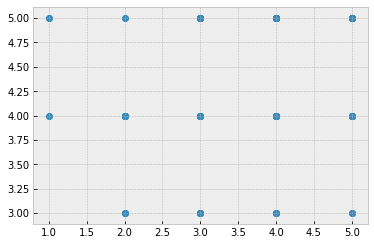

In [18]:
import decisionTree

decisionTree.dt(xTrain, yTrain, xTest, yTest)

Let's try to plot the learning curve for the Decision Tree model.

<module 'matplotlib.pyplot' from 'c:\\users\\sriram veturi\\appdata\\local\\programs\\python\\python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

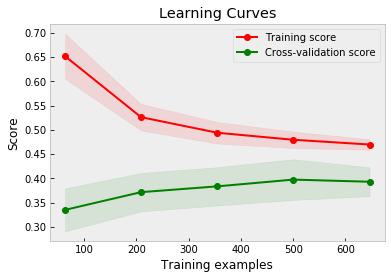

In [19]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

# Below function is taken from the official documentation of "sklearn" 
# Link : http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


title = "Learning Curves"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = DecisionTreeClassifier(max_depth=3)
plot_learning_curve(estimator, title, xTrain, yTrain, cv=cv, n_jobs=4)

### KNN Model

Let's try to predict using K-Nearest Neighbours model. Clearly, KNN fails miserably and the accuracy is 30.7%.

Hyperparameter Tuning!
The best parameters for KNN model are :
{'n_neighbors': 1}

KNN Evaluation :

Training Accuracy => 100.0
Testing Accuracy => 30.693069306930692

Confusion Matrix => 
[[ 0  0  2  3  2]
 [ 0  3 10  5  3]
 [ 2  6 11  7 12]
 [ 2  5  7 20 33]
 [ 1  5 16 19 28]]

Classification Summary => 
             precision    recall  f1-score   support

        1.0       0.00      0.00      0.00         7
        2.0       0.16      0.14      0.15        21
        3.0       0.24      0.29      0.26        38
        4.0       0.37      0.30      0.33        67
        5.0       0.36      0.41      0.38        69

avg / total       0.31      0.31      0.30       202




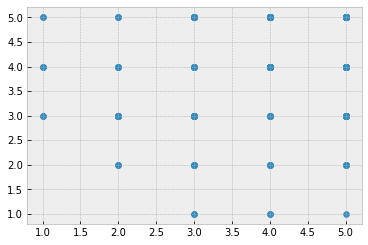

In [20]:
import KNN

KNN.knn(xTrain, yTrain, xTest, yTest)

Let's try to plot the learning curves for KNN model.

<module 'matplotlib.pyplot' from 'c:\\users\\sriram veturi\\appdata\\local\\programs\\python\\python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

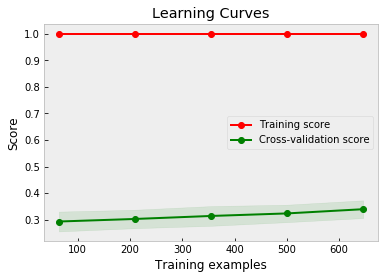

In [22]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

# Below function is taken from the official documentation of "sklearn" 
# Link : http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


title = "Learning Curves"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = KNeighborsClassifier(n_neighbors=1)
plot_learning_curve(estimator, title, xTrain, yTrain, cv=cv, n_jobs=4)

### Logistic Regression

Let's try to predict using Logistic Regression model. 

Logistic Regression Evaluation :

Testing Accuracy => 41.089108910891085
Confusion Matrix => 
[[ 0  0  0  2  5]
 [ 0  0  8 10  3]
 [ 0  1 10 11 16]
 [ 0  0 13 19 35]
 [ 1  0  5  9 54]]

Classification Summary => 
             precision    recall  f1-score   support

        1.0       0.00      0.00      0.00         7
        2.0       0.00      0.00      0.00        21
        3.0       0.28      0.26      0.27        38
        4.0       0.37      0.28      0.32        67
        5.0       0.48      0.78      0.59        69

avg / total       0.34      0.41      0.36       202




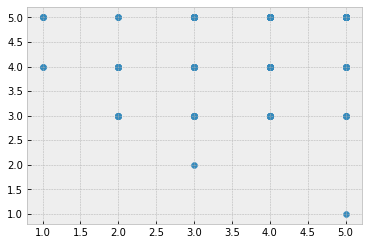

In [21]:
import logReg

logReg.logisticRegression(xTrain, yTrain, xTest, yTest)

Let's look at the learning curve of Logistic Regression.

<module 'matplotlib.pyplot' from 'c:\\users\\sriram veturi\\appdata\\local\\programs\\python\\python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

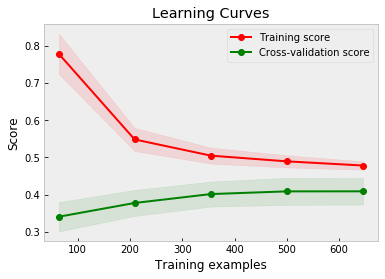

In [22]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

# Below function is taken from the official documentation of "sklearn" 
# Link : http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


title = "Learning Curves"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LogisticRegression(multi_class='ovr', random_state=0, C=3)
plot_learning_curve(estimator, title, xTrain, yTrain, cv=cv, n_jobs=4)

### Logistic Regression (SelectKBest Feature Method)

Let's try to use Logistic Regression by using SelectKBest method from sklearn library.

Cross Validating for best parameters..
This might take some time..

The best parameters for Logistic Regression model are :
{'C': 10, 'max_iter': 100, 'solver': 'lbfgs'}

Logistic Regression using SelectKBest Method Evaluations :

Training Accuracy : 42.945544554455445
Testing Accuracy  : 41.089108910891085

Confusion Matrix => 
[[ 0  0  0  2  5]
 [ 1  1  6 10  3]
 [ 0  2 10 12 14]
 [ 1  0  9 15 42]
 [ 1  0  5  6 57]]

Classification Summary => 
             precision    recall  f1-score   support

        1.0       0.00      0.00      0.00         7
        2.0       0.33      0.05      0.08        21
        3.0       0.33      0.26      0.29        38
        4.0       0.33      0.22      0.27        67
        5.0       0.47      0.83      0.60        69

avg / total       0.37      0.41      0.36       202




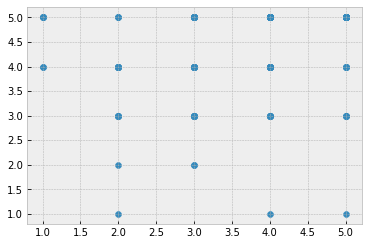

In [23]:
import selectKBestlogReg

selectKBestlogReg.kBestLogReg(filledData)

<module 'matplotlib.pyplot' from 'c:\\users\\sriram veturi\\appdata\\local\\programs\\python\\python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

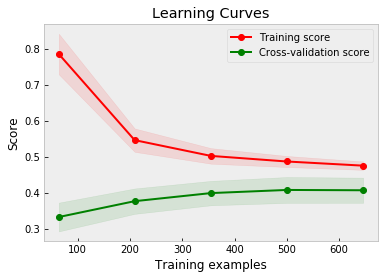

In [24]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

# Below function is taken from the official documentation of "sklearn" 
# Link : http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


title = "Learning Curves"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LogisticRegression(C=10, max_iter=100, solver='lbfgs', multi_class='ovr', random_state=1)
plot_learning_curve(estimator, title, xTrain, yTrain, cv=cv, n_jobs=4)

### Multilayer Perceptron

 Let's predict the empathy using Multilayer Perceptron. <br>
 *Note: While using Multilayer Perceptron, it is needed to have normalized dataset.*

SIT BACK AND RELAX! CROSS VALIDATION WOULD TAKE SOME TIME...
LOT OF STATEMENTS LOOKING LIKE ERRORS MIGHT POP UP...

The best parameters for MLP model are :
{'alpha': 0.1, 'hidden_layer_sizes': (100, 200), 'max_iter': 1000}

Multilayer Perceptron Evaluation :

Training Accuracy => 60.396039603960396
Testing Accuracy => 63.366336633663366

Confusion Matrix => 
[[ 5  1  6  0  0]
 [ 4  9 16  0  0]
 [ 1  2 25 14  0]
 [ 0  0 12 31 13]
 [ 0  0  1  4 58]]

Classification Summary => 
             precision    recall  f1-score   support

        1.0       0.50      0.42      0.45        12
        2.0       0.75      0.31      0.44        29
        3.0       0.42      0.60      0.49        42
        4.0       0.63      0.55      0.59        56
        5.0       0.82      0.92      0.87        63

avg / total       0.65      0.63      0.63       202




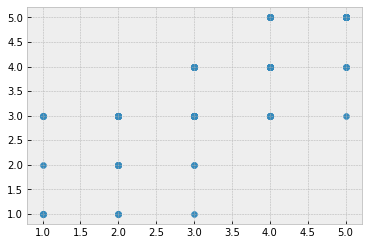

In [25]:
import MLP

MLP.mlp(df, scaledData, targetVariable)

<module 'matplotlib.pyplot' from 'c:\\users\\sriram veturi\\appdata\\local\\programs\\python\\python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

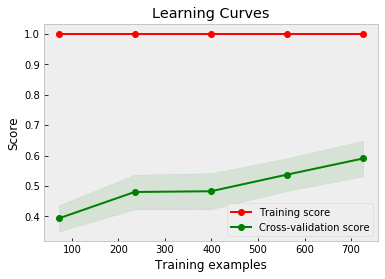

In [26]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

# Below function is taken from the official documentation of "sklearn" 
# Link : http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=10,
                        n_jobs=10, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


title = "Learning Curves"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
xTrain, xTest, yTrain, yTest = train_test_split(scaledData, targetVariable, test_size=0.2, random_state=0, shuffle=False)
xTrain = xTrain.sort_index()
xTest = xTest.sort_index()
yTrain = yTrain.sort_index()
yTest = yTest.sort_index()

estimator = MLPClassifier(hidden_layer_sizes=(100, 200), alpha=0.1, max_iter=500)
plot_learning_curve(estimator, title, xTrain, yTrain, cv=10, n_jobs=10)

From all the models that I have tried like Decision Trees, KNN, Logistic Regression and Multilayer Perceptron, we can clearly say that Multilayer Perceptron acts as the best model for the dataset provided. 

### Some Interesting Insights drawn from the Dataset and Models<br>
**Why 'Gender' is related to 'Life Struggles'?**
To answer the question of why 'Life Struggles' is related to 'Gender', I would first point to the strong correlation in 'Gender' with 'height' and 'weight'. Thus, we can say that 'Life Struggles' is strongly correlated with 'height' and 'weight'. Women are shorter in height and lighter in weight than men. The original phrase for 'Life Struggles' is 'I cry when I feel down or things don't go the right way'. Since, womenn used this phrase a lot in the dataset, 'Life Struggles' and 'Gender' are said to be correlated strongly.<br><br>
**Why 'Gender' is related to 'Western'?**
Unlike the previous argument, in case of correlation between 'Western' and 'Gender', from in-depth analysis of data, we get to know that 75% of the people have voted more than 3 when asked whether they like 'Western Movies' and majority of the people have voted 5 for the question. These statistics show that most of the people like 'Western Movies' irrespective of the 'Gender'.<br><br>
**Is the Multilayer Perceptron really learning or just memorizing the dataset?**
This question is really an interesting one. As you increase the hidden layers and the neurons in those hidden layers, you clearly find that the training and testing accuracy shoot up. I tried to understand why this phenonmenon is happening and got to know of the memorization capabilities of the deep neural networks from a Technical paper published by several Deep Networks scholars from MIT and Google. The link to the paper is <a href="https://arxiv.org/pdf/1706.05394.pdf">this</a>. By understanding how the deep networks are capable of memorizing the datasets with relatively smaller size like the one used in this project. In order to get the best accuracy, I would say Deep Neural Networks are the best for such datasets. But I also tend to doubt my model to a certain extent because it is a sheer memorization process and not an actual training that is happening. Because the scope of the project was not very huge, I would not dig much deeper into it and conclude that using Deep Neural Networks like a Multilayer Perceptron is the best strategy to gain maximum advantage. 